# SIR models in epidemiology


The SIR model is one of the simplest compartmental models, and many models are derivatives of this basic form. The model consists of three compartments:

- S: The number of susceptible individuals. When a susceptible and an infectious individual come into "infectious contact", the susceptible individual contracts the disease and transitions to the infectious compartment.
- I: The number of infectious individuals. These are individuals who have been infected and are capable of infecting susceptible individuals.
- R for the number of removed (and immune) or deceased individuals. These are individuals who have been infected and have either recovered from the disease and entered the removed compartment, or died. It is assumed that the number of deaths is negligible with respect to the total population. This compartment may also be called "recovered" or "resistant".
This model is reasonably predictive for infectious diseases that are transmitted from human to human, and where recovery confers lasting resistance, such as measles, mumps and rubella.


Spatial SIR model simulation. Each cell can infect its eight immediate neighbors.
These variables (S, I, and R) represent the number of people in each compartment at a particular time. To represent that the number of susceptible, infectious and removed individuals may vary over time (even if the total population size remains constant), we make the precise numbers a function of t (time): $S(t), I(t)$ and $R(t)$. For a specific disease in a specific population, these functions may be worked out in order to predict possible outbreaks and bring them under control.

- $\beta$ is the average number of contacts per person per time
- $\gamma$  is the average number of person removed per time


####  Bio-mathematical deterministic treatment of the SIR model

   $\frac{dS}{dt} = -\beta S I$ <br>
   $\frac{dI}{dt} = \beta S I- \gamma I$ <br>
    $\frac{dR}{dt} =  \gamma I$

In [5]:
using Plots, IJulia,DifferentialEquations, Interact,WebIO
function SIR!(du,u,p,t)
    S, I, R = u
    β, γ= p
     
    dS = -β*S*I
    dI = β*S*I-γ*I
    dR = γ*I
    
    du .= (dS, dI, dR)
    end 


SIR! (generic function with 1 method)

In [12]:
β=0.1
γ=0.01
parameters = [β, γ]

initial_values = [0.99,0.01,0.0]

t_span = [ 0.0, 10]

problem = ODEProblem(SIR!, initial_values, t_span, parameters)

solution = solve(problem, saveat = 0.1);

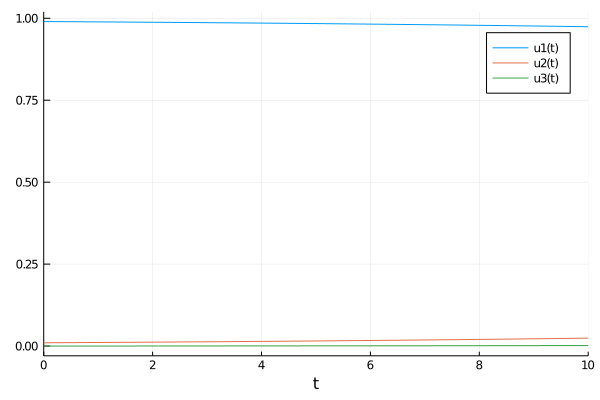

In [13]:
 plot(solution)

In [14]:
r = 0.0:0.01:0.50
q = 0.0:0.01:0.10
@manipulate for β in r, γ in q, T in 0:1:300.0

parameters = [β, γ]

initial_values = [0.99,0.01,0.0]

t_span = [ 0.0, T]
    
problem = ODEProblem(SIR!, initial_values, t_span, parameters)

solution = solve(problem, saveat = 0.1)
     plot(solution,w=2)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["β"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 51,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
26, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/suresh/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/suresh/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/suresh/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/home/suresh/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/home/suresh/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f0e6a7f0760, Task (runnable) @0x00007f0e6a7f0760), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"0.24\",\"0.25\",\"0.26\",\"0.27\",\